<a href="https://colab.research.google.com/github/sindyalvinaa/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

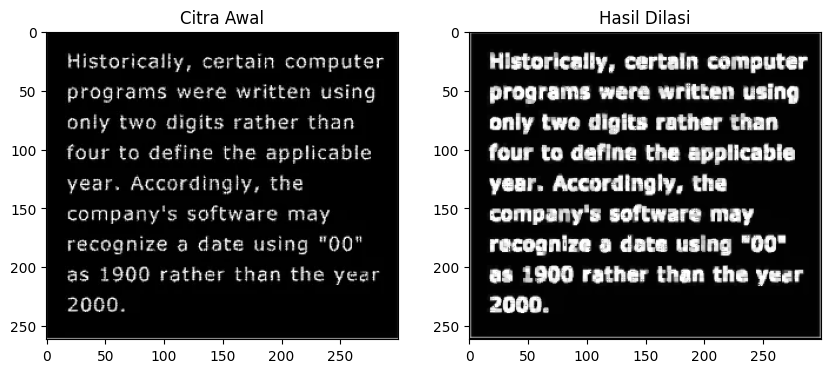

In [3]:

# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/morphology.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SED) berbentuk square 3 x 3
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)


# Membuat gambar kosong untuk menampung hasil dilasi
dilated_img = np.zeros_like(img)

# Mendapatkan ukuran gambar input
height, width = img.shape

# Looping untuk melakukan operasi dilasi
for i in range(1, height-1):
    for j in range(1, width-1):
        # Melakukan dilasi pada setiap piksel pada gambar input
        dilated_pixel = np.max(img[i-1:i+2, j-1:j+2] + kernel)
        dilated_img[i, j] = dilated_pixel

# Menampilkan gambar input dan hasil dilasi
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(dilated_img, cmap='gray')
axs[1].set_title('Hasil Dilasi')
plt.show()


In [4]:
# 4. implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk square 3 x 3 
# dengan menggunakan library morphology dari openCV
img2 = cv.imread('/content/drive/MyDrive/PCVK/Images/week9/morphology.png')
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)
dilation = cv2.morphologyEx(img2, cv2.MORPH_DILATE, kernel) #morphologyEX berfungsi untuk menghilangkan noise, 

print(kernel)

plt.subplot(121), plt.imshow(img2), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

NameError: ignored

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


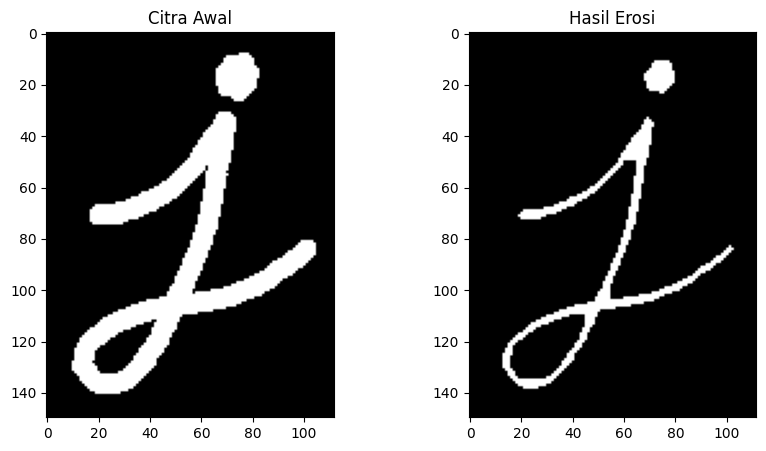

In [5]:
# 5.Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

img3 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5, 5), dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil erosi
eroded_img = np.zeros_like(img3)

# Mendapatkan ukuran gambar input
height, width = img3.shape

# Looping untuk melakukan operasi erosi
for i in range(2, height-2):
    for j in range(2, width-2):
        # Melakukan erosi pada setiap piksel pada gambar input
        eroded_pixel = np.min(img3[i-2:i+3, j-2:j+3] * kernel)
        eroded_img[i, j] = eroded_pixel

print(kernel)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img3, cmap='gray')
axs[0].set_title('Citra Awal')
axs[1].imshow(eroded_img, cmap='gray')
axs[1].set_title('Hasil Erosi')
plt.show()

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

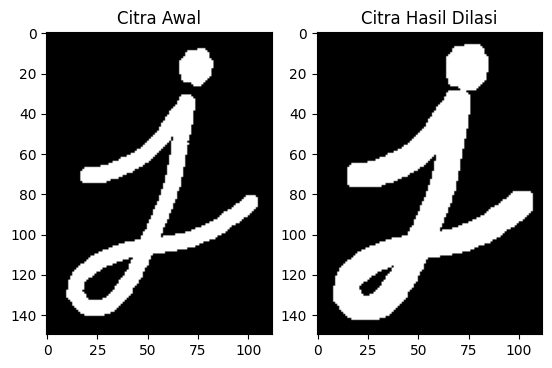

In [6]:
# 6. implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk square 5 x 5 
# dengan menggunakan library morphology dari openCV
img4 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

kernel = np.ones((5,5), np.uint8)
dilation = cv2.morphologyEx(img4, cv2.MORPH_DILATE, kernel) #morphologyEX berfungsi untuk menghilangkan noise, 

plt.subplot(121), plt.imshow(img4), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')

<ipython-input-7-44ee3f727d7a>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img5, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

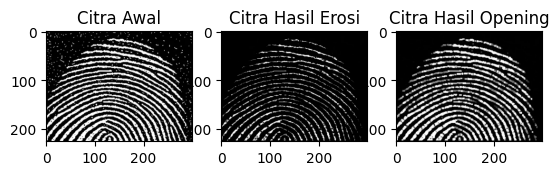

In [7]:
# Membaca image untuk operasi erosi
img5 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/fingerprint.png', 0)

#Acquire size of the image
m, n = img5.shape

#Show the image
plt.imshow(img5, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img5[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Read the image for dilation
img5_2 = imgErode

#Acquire size of the image
p, q= img5_2.shape

#Show the image
plt.imshow(img5_2, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img5_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img5, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Opening')# Membaca image untuk operasi erosi

(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

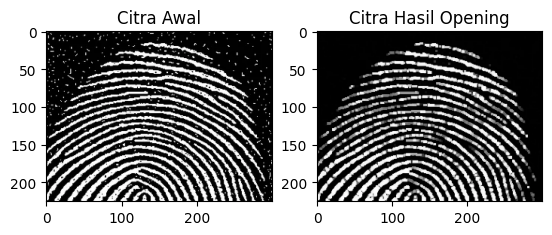

In [8]:
img5l = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/fingerprint.png')
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(img5l, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(img5l), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening), plt.title('Citra Hasil Opening')

<ipython-input-9-d5be1a7ff592>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

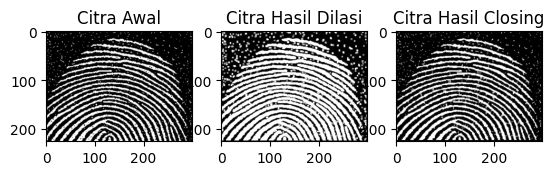

In [9]:
# Membaca image untuk operasi erosi
img6 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/fingerprint.png', 0)

#Acquire size of the image
m, n= img6.shape

#Show the image
plt.imshow(img6, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((m,n), dtype=np.uint8)

#Define the structuring element 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, m-constant1):
  for j in range(constant1,n-constant1):
    temp = img6[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for dilation
img6_2 = imgDilate

#Acquire size of the image
m, n = img6_2.shape

#Show the image
plt.imshow(img6_2, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img6_2[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(133),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Closing')# Membaca image untuk operasi erosi

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

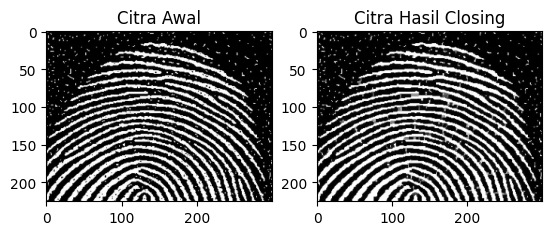

In [10]:
# 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV
# dengan menggunakan library morphology dari openCV
img6l = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/fingerprint.png')
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(img6l, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(img6l), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(closing), plt.title('Citra Hasil Closing')

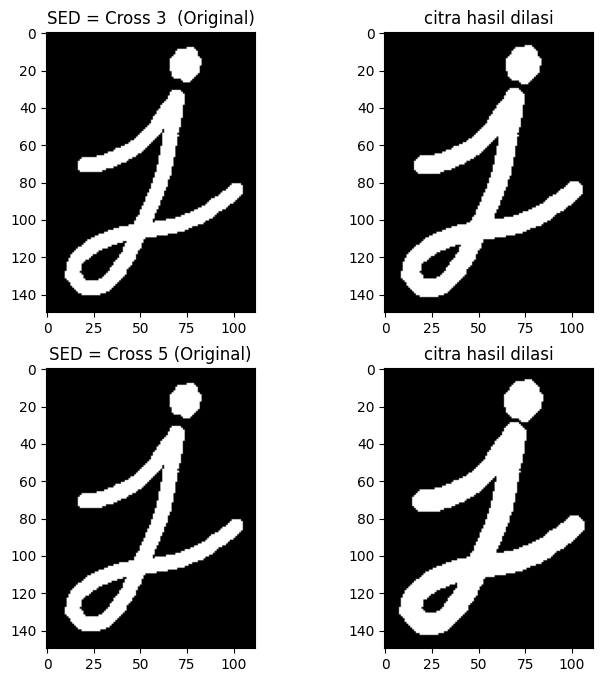

In [11]:
# Load image
img7 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

# Define structuring element Cross 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

# Dilate image with Cross 3x3 kernel
dilation3 = cv2.dilate(img7, kernel3, iterations=1)

# Dilate image with Cross 5x5 kernel
dilation5 = cv2.dilate(img7, kernel5, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img7, cmap='gray')
axs[0, 0].set_title('SED = Cross 3  (Original)')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('citra hasil dilasi')
axs[1, 0].imshow(img7, cmap='gray')
axs[1, 0].set_title('SED = Cross 5 (Original)')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('citra hasil dilasi')
plt.show()

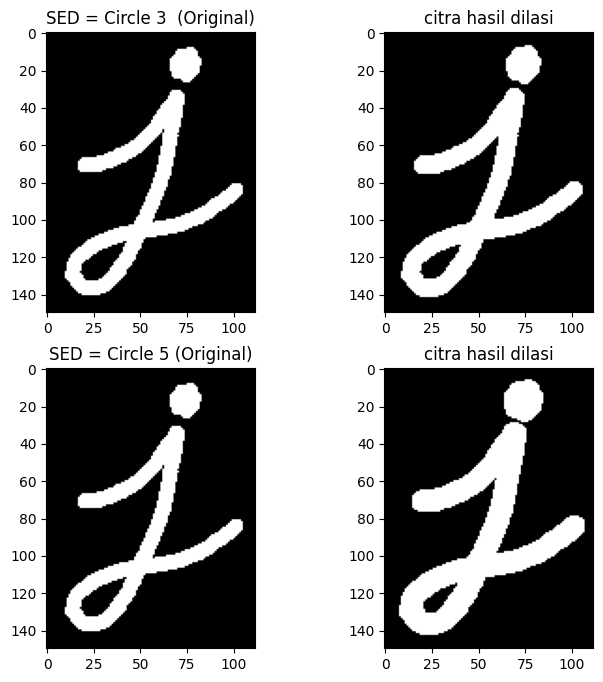

In [12]:
# Load image
img8 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

# Define structuring element circular 3x3 and 5x5
kern6 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kern7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Dilate image with circular 3x3 kernel
dilation6 = cv2.dilate(img8, kern6, iterations=1)

# Dilate image with circular 5x5 kernel
dilation7 = cv2.dilate(img8, kern7, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img8, cmap='gray')
axs[0, 0].set_title('SED = Circle 3  (Original)')
axs[0, 1].imshow(dilation6, cmap='gray')
axs[0, 1].set_title('citra hasil dilasi')
axs[1, 0].imshow(img8, cmap='gray')
axs[1, 0].set_title('SED = Circle 5 (Original)')
axs[1, 1].imshow(dilation7, cmap='gray')
axs[1, 1].set_title('citra hasil dilasi')
plt.show()

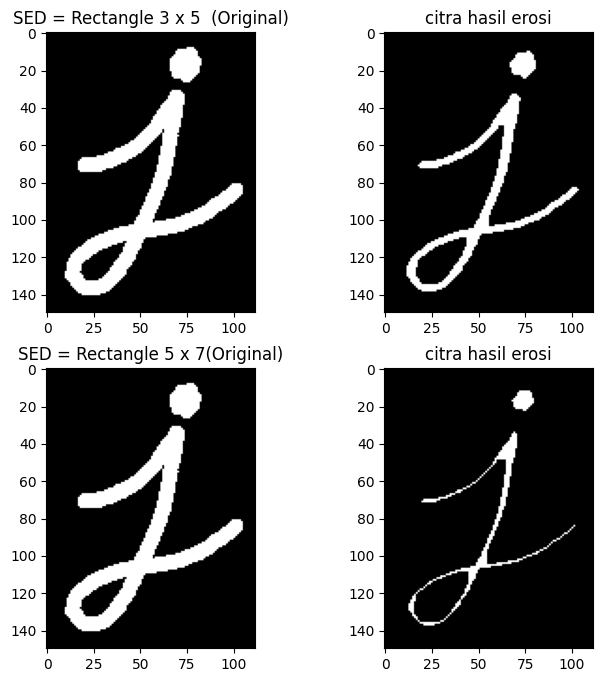

In [13]:
# Load image
img9 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

# Define structuring element Rectangle 3x5 and 5x7

kern8 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,5))
kern9 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,7))

# Dilate image with Rectangle 3x3 kernel
erode8 = cv2.erode(img9, kern8, iterations=1)

# Dilate image with Rectangle 5x5 kernel
erode9 = cv2.erode(img9, kern9, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img9, cmap='gray')
axs[0, 0].set_title('SED = Rectangle 3 x 5  (Original)')
axs[0, 1].imshow(erode8, cmap='gray')
axs[0, 1].set_title('citra hasil erosi')
axs[1, 0].imshow(img9, cmap='gray')
axs[1, 0].set_title('SED = Rectangle 5 x 7(Original)')
axs[1, 1].imshow(erode9, cmap='gray')
axs[1, 1].set_title('citra hasil erosi')
plt.show()

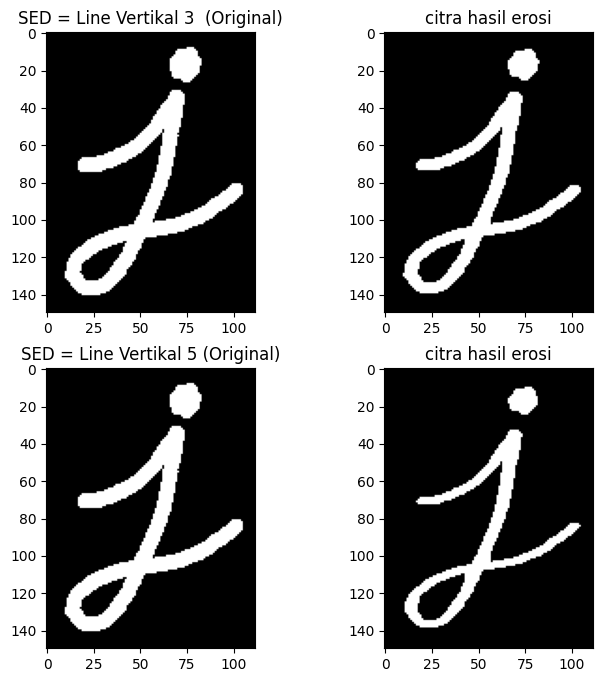

In [14]:
# Load image
img10 = cv2.imread('/content/drive/MyDrive/PCVK/Images/week9/j.png')

# Define structuring element Line Vertikal 3x3 and 5x5
kern1 = np.ones((3,1),np.uint8)
kern2 = np.ones((5,1),np.uint8)  
erosi10 = cv2.morphologyEx(img10, cv2.MORPH_ERODE, kern1)
erosi11 = cv2.morphologyEx(img10, cv2.MORPH_ERODE, kern2)


# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img10, cmap='gray')
axs[0, 0].set_title('SED = Line Vertikal 3  (Original)')
axs[0, 1].imshow(erosi10, cmap='gray')
axs[0, 1].set_title('citra hasil erosi')
axs[1, 0].imshow(img10, cmap='gray')
axs[1, 0].set_title('SED = Line Vertikal 5 (Original)')
axs[1, 1].imshow(erosi11, cmap='gray')
axs[1, 1].set_title('citra hasil erosi')
plt.show()